# 葡萄酒质量

## 一、目的

1.以葡萄酒类型为标签，分为⽩葡萄酒和红葡萄酒。⽐较这两种葡萄酒的差别并选取葡萄酒的化学成分：固定酸度、挥发性酸度、柠檬酸、氯化物、游离⼆氧化硫、总硫度、密度、PH值、硫酸盐、酒精度数。

2.分析什么水平的酸度（pH 值）代表质量更高。

3.分析酒精度和质量评分的关系，以及各化学特性与质量评分的相关性。

4.分析是否特定类型的葡萄酒（红葡萄酒或白葡萄酒）的品质更高。

5.分析酒精含量更高的葡萄酒是否获得的评价更高。

6.分析味道更甜（残糖更多）的葡萄酒是否获得的评价更高。

7.针对酒的各类化学成分建⽴线性回归模型，降维处理，相关性分析，分别用不同算法建模，通过调参、优化，从⽽预测该葡萄酒的质量评分。

## 二、数据收集

### 2.1 数据来源
来自 UCI 机器学习实验室的葡萄酒质量数据集：
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

葡萄酒数据集提供了有关葡萄牙“青酒”的红葡萄酒和白葡萄酒变体的样本信息。
每种样本都由专家做了质量评级，并进行了理化指标检验。

### 2.2 数据集字段说明

fixed acidity 固定酸度

volatile acidity 挥发性酸度

citric acid 柠檬酸

residual sugar 残糖

chlorides 氯化物

free sulfur dioxide 游离二氧化硫

total sulfur dioxide 总二氧化硫

density 密度

pH pH值

sulphates 硫酸盐

alcohol 酒精度

quality 质量 - 0 到 10 之间的得分（葡萄酒专家至少 3 次评估的中值）。

## 三、数据预处理

### 3.1 引入所需模块

In [2]:
import pandas as pd;
import matplotlib as mpl
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt;
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm


### 3.2 导入数据

In [3]:
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 读取红葡萄酒数据
data1 = pd.read_csv('winequality-red.csv',sep=";")
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 读取白葡萄酒数据
data2 = pd.read_csv('winequality-white.csv', sep=';')
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3.3 查看所有列的列表及其数据类型

In [76]:
data1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [77]:
data2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

从上可以看出，除了葡萄酒的type位object类型，其余特征的数据类型都为float型，没有问题，所以不需要进行数据类型处理。

In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


从中可以看出，红葡萄酒的样本共有1599个。

In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


从中可以看出，白葡萄酒的样本共有4898个。

### 3.4 查看缺失值

In [55]:
data1.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
#缺失值总计
data1.isnull().sum().sum()

0

In [57]:
data2.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
data2.isnull().sum().sum()

0

由上可以看出，葡萄酒质量数据集中没有缺失值，因此，不需要对缺失值进行处理。

### 3.5 重复值检测

In [61]:
data1.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [63]:
#删除多余的重复项
data1.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:
data2.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [65]:
#删除多余的重复项
data1.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 3.6 检测异常值

简单查看一下是否有异常值

In [67]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [69]:
data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


没发现明显的异常值，不需要进行处理。

## 四、数据分析

质量评分分析

In [6]:
# 设置数据类型为红葡萄酒
data1['type'] = 1

# 设置数据类型为白葡萄酒
data2['type'] = 2

# 合并两个df
data = pd.concat([data1,data2], axis=0)

# 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]
# 因变量名称
quality = "quality"

In [19]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


质量评分的频数统计

In [87]:
#找出葡萄酒质量的评级
print(sorted(data.quality.unique()))

[3, 4, 5, 6, 7, 8, 9]


可以看出质量评分为3-9分

In [88]:
#对评级进行频数统计
print(data.quality.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


其中质量评分为6的数量是最多的，其次是评分为5， 质量评分为9的数量是最少的。

质量评分的描述性统计

In [86]:
# 按照葡萄酒类型显示质量的描述性统计量
print(data.groupby('type')[['quality']].describe().unstack('type'))

                type
quality  count  1       1599.000000
                2       4898.000000
         mean   1          5.636023
                2          5.877909
         std    1          0.807569
                2          0.885639
         min    1          3.000000
                2          3.000000
         25%    1          5.000000
                2          5.000000
         50%    1          6.000000
                2          6.000000
         75%    1          6.000000
                2          6.000000
         max    1          8.000000
                2          9.000000
dtype: float64


按葡萄酒的类型分组，分为两组,：红葡萄酒和白葡萄酒。分别打印出两组葡萄酒的质量的摘要统计量。

可以看出红葡萄酒和白葡萄酒的数据量相差很大，但均值、最值等都相差不大。

绘制质量评分的直方图

In [88]:

# 按照葡萄酒类型显示质量的特定分位数值
print(data.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))


     quality     
type       1    2
0.25     5.0  5.0
0.75     6.0  6.0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


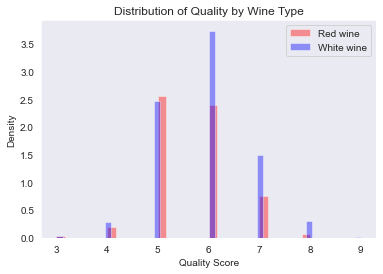

In [91]:
# 按照葡萄酒类型查看质量分布
red_wine = data.loc[data['type'] == 'red', 'quality']
white_wine = data.loc[data['type'] == 'white', 'quality']
sns.set_style("dark")
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, norm_hist=True, kde=False, color="blue", label="White wine"))
sns.utils.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

In [109]:
# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(data.groupby(['type'])[['quality']].agg(['std']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

        quality
            std
type           
red    0.807569
white  0.885639
tstat: -9.686 pvalue: 0.0000


由绘制的密度分布直方图和输出结果可以得出结论：两种葡萄酒的评分都近似正态分布；t检验统计量为-9.686，p值为0.000，这说明白葡萄酒的平均质量评分在统计意义上大于红葡萄酒的平均质量评分（从检验的结果来看，p值<0.05，红白两种葡萄酒质量有显著性差异，并且从均值上来看白葡萄酒的平均质量等级在统计意义上大于红葡萄酒的平均质量等级。）

In [188]:
data.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [40]:
#分析酒精含量高的酒是否评分较高
data.median().alcohol

10.3

In [42]:
low_alcohol= data.query('alcohol<10.3')
high_alcohol= data.query('alcohol>=10.3')
num_samples = data.shape[0]
num_samples =low_alcohol['quality'].count()+high_alcohol['quality'].count()

In [43]:
high_alcohol.mean().quality,low_alcohol.mean().quality,

(6.146084337349397, 5.475920679886686)

In [80]:
median=data['alcohol'].median()
low=data.query('alcohol<={}'.format(median))
high=data.query('alcohol>={}'.format(median))

mean_quality_low=low['quality'].mean()
mean_quality_high=high['quality'].mean()

Text(0, 0.5, 'Average Quality Ratings')

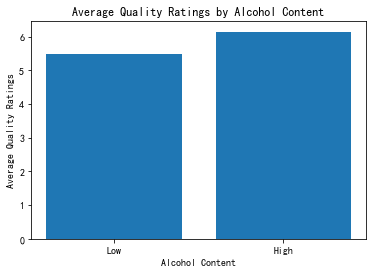

In [82]:
locations=[1,2]
heights=[mean_quality_low,mean_quality_high]
labels=['Low','High']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Ratings')

上边的柱状图，左边表示酒精含量低的酒样本，另一个边酒精含量高的酒样本。

可以看到，酒精含量高的酒评分较高

In [108]:
data['quality']
data.groupby('sulphates').mean().quality

sulphates
0.22    7.000000
0.23    6.000000
0.25    6.250000
0.26    7.250000
0.27    6.461538
          ...   
1.61    6.000000
1.62    5.000000
1.95    6.000000
1.98    5.000000
2.00    4.000000
Name: quality, Length: 111, dtype: float64

In [185]:
data.groupby('type').mean().quality

type
1    5.636023
2    5.877909
Name: quality, dtype: float64

白葡萄酒的平均质量较红葡萄酒的高。

## 五、算法建模及预测

### 5.1 化学成分间的相关性分析

In [133]:

# 计算所有变量的相关矩阵
print(data.corr())


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
in_sample                  0.085416          0.105723    -0.003296   

                   

从各变量的相关系数来看酒精含量、硫酸酯、pH 值、游离二氧化硫和柠檬酸这些指标与质量呈现正相关，即当这些指标的含量增加时，葡萄酒的质量会提高；非挥发性酸、挥发性酸、残余糖分、氯化物、总二氧化硫和密度这些指标与质量呈负相关即当这些指标的含量增加时，葡萄酒的质量会降低。从相关系数可以看出，对葡萄酒质量影响最大的是葡萄酒是酒精含量，其相关系数为0.444，其次是酒的密度，但酒的密度对酒的质量是负影响的。

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn import metrics


### 5.2 利用线性回归算法建模对葡萄酒质量进行预测

In [32]:
X = data[names]
Y = data[quality]
Y.ravel()

# 创建模型列表
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ])
   
]


线:1阶, 截距:104, 系数: [ 0.00000000e+00  8.50118207e-02 -1.48620723e+00 -6.90416760e-02
  6.23516751e-02 -7.18643184e-01  4.99059722e-03 -1.45047299e-03
 -1.03460590e+02  4.97432666e-01  7.21153860e-01  2.23033948e-01
 -3.51639435e-01]
线:2阶, 截距:-926, 系数: [-1.53328487e-05 -2.75607377e+01  1.01172114e+02  2.48363269e+02
 -1.75937002e+01 -1.15256738e+03 -2.47657152e+00  9.08814008e-01
  1.51673134e+03  1.22648432e+02  5.79953111e+01  2.03593912e+01
  1.55559062e+01 -4.34318334e-02  3.31320951e-02  4.24739822e-01
 -2.31878257e-02 -2.40247894e+00 -7.35719394e-05  3.64009508e-04
  2.78865437e+01  9.27783430e-02  2.07233708e-01  1.34480741e-02
  5.45491073e-02  4.37670831e-01  8.75879631e-01 -3.84236402e-02
  1.10461091e+00  5.84956240e-03  7.21047495e-03 -1.09383486e+02
  9.44208782e-01  3.90477721e-01  3.15802918e-01 -1.20298473e+00
 -1.04158882e+00  6.70367332e-02  6.55542659e+00  8.39269381e-03
 -5.18668354e-04 -2.58961482e+02  1.54314156e+00 -5.12297706e-01
 -1.24440988e-02  6.56758030e-01 -9

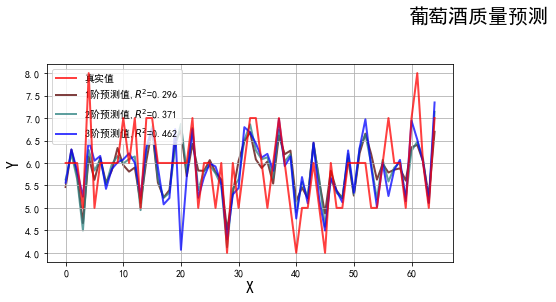

In [33]:
plt.figure(figsize=(16,8), facecolor='w')
titles = u'线性回归预测'

# 将数据分为训练数据和测试数据
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

# 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶
m = len(d_pool)
# 颜色
clrs = []
for c in np.linspace(5570560, 255, m):
    clrs.append('#%06x' % int(c))

for t in range(1):
    plt.subplot(2, 2, t + 1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r', lw=2, alpha=0.75, zorder=10, label=u'真实值')
    for i,d in enumerate(d_pool):
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train, Y_train)
        # 模型预测及计算R^2
        Y_pre = model.predict(X_test)
        R = model.score(X_train, Y_train)
        # 输出信息
        lin = model.get_params('Linear')['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output, lin.coef_)
        # 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2,alpha=0.75, zorder=i, label=u'%d阶预测值,$R^2$=%.3f' % (d,R))
    plt.legend(loc = 'upper left')
    plt.grid(True)
    #plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle(u'葡萄酒质量预测', fontsize=20)
plt.show()

### 5.3 用Softmax分类算法预测葡萄酒质量

In [9]:
# 1. 数据分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

print ("训练数据条数:%d；数据特征个数:%d；测试数据条数:%d" % (X_train.shape[0], X_train.shape[1], X_test.shape[0]))


训练数据条数:4872；数据特征个数:12；测试数据条数:1625


In [10]:
# 2. 数据归一化
ss = MinMaxScaler()
X_train = ss.fit_transform(X_train)
# 查看y值的范围和数据
Y_train.value_counts()


6    2132
5    1606
7     805
4     161
8     146
3      20
9       2
Name: quality, dtype: int64

In [47]:
# 查看数据分布情况
[len(data[data.quality == i]) for i in range(11)]


[0, 0, 0, 30, 216, 2138, 2836, 1079, 193, 5, 0]

In [49]:
data.quality.value_counts()


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#### 使用PCA降维处理

训练数据条数:6334；数据特征个数:12；测试数据条数:163


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

R值： 0.474581622987054
特征稀疏化比率：0.00%
参数： [[ 1.82780315e+00  1.74198516e+00 -4.74600981e-01  1.34389200e+00
   1.52453444e-01 -1.22802226e-01 -2.71681528e+00  1.94227000e-01
   9.92027646e-01 -2.80459518e-01 -1.02806505e+00  2.33494087e-01]
 [-9.72791213e-01  4.07521127e+00 -2.03158004e+00 -2.38313821e+00
   4.17268517e-02 -6.32151418e+00  6.06663183e-01  1.06144316e+00
   4.17405242e+00 -1.08900198e+00  2.01696478e+00  3.33933611e+00]
 [ 7.38384041e+00  1.47439638e+01 -6.20549637e+00  6.74068721e-01
   1.67434723e+00 -1.11766841e+00 -1.05474504e+00  6.51180780e+00
   2.41470938e+01 -8.97288161e-01 -1.53559111e+01 -7.32551486e+00]
 [ 2.30237856e+00 -7.32144161e+00  2.06473085e+00  1.53111806e+00
  -3.05063539e-01  1.81983186e+00  9.08474529e-01 -1.04402756e+00
  -4.17019177e+00  1.51145813e+00 -3.40518419e-01  1.69859347e+00]
 [-2.50149818e+00 -1.13894704e+01  5.63489143e+00 -1.33862817e+00
  -1.22264648e+00  2.30850665e+00  1.06406290e+00 -5.39008364e+00
  -2.01462408e+01  1.20549254e+0

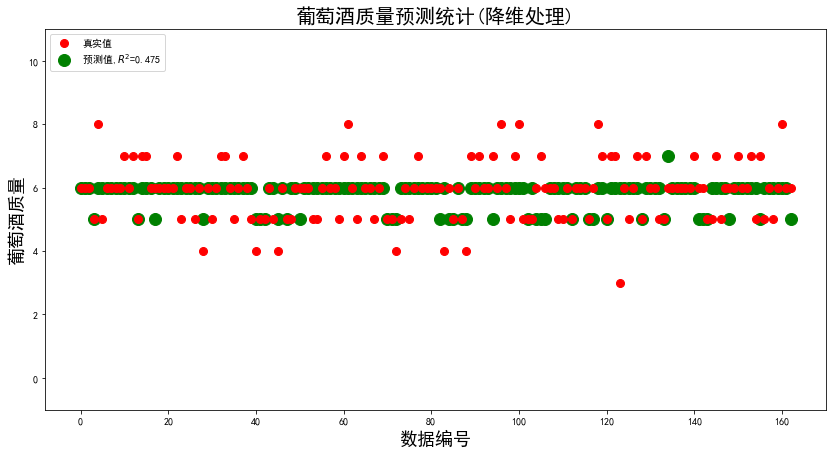

In [11]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer

# 1. 数据分割
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X,Y,test_size=0.025,random_state=0)
print ("训练数据条数:%d；数据特征个数:%d；测试数据条数:%d" % (X1_train.shape[0], X1_train.shape[1], X1_test.shape[0]))

# 2. 数据特征转换（归一化）
ss2 = Normalizer()
# 训练模型及归一化数据
X1_train = ss2.fit_transform(X1_train)

# 3. 特征选择，只考虑3个维度
# skb = SelectKBest(chi2, k=3)
# 训练模型及特征选择
# X1_train = skb.fit_transform(X1_train, Y1_train)

# 4. 降维
# 将样本数据维度降低成为2个维度
# pca = PCA(n_components=5)
# X1_train = pca.fit_transform(X1_train)
# print("贡献率:", pca.explained_variance_)

# 5. 模型构建
lr2 = LogisticRegressionCV(fit_intercept=True, Cs=np.logspace(-5, 1, 100), 
                          multi_class='multinomial', penalty='l2', solver='lbfgs')
lr2.fit(X1_train, Y1_train)

# 6. 模型效果输出
r = lr2.score(X1_train, Y1_train)
print("R值：", r)
print("特征稀疏化比率：%.2f%%" % (np.mean(lr2.coef_.ravel() == 0) * 100))
print("参数：",lr2.coef_)
print("截距：",lr2.intercept_)

# 7. 数据预测
# a. 预测数据格式化（归一化）
# 测试数据归一化
X1_test = ss2.transform(X1_test)
# 测试数据特征选择
# X1_test = skb.transform(X1_test)
# 测试数据降维
# X1_test = pca.fit_transform(X1_test)

# b. 结果数据预测
Y1_predict = lr2.predict(X1_test)

# c. 图表展示
x1_len = range(len(X1_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-1,11)
plt.plot(x1_len, Y1_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x1_len, Y1_predict, 'go', markersize = 12, zorder=2, label=u'预测值,$R^2$=%.3f' % lr2.score(X1_train, Y1_train))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'葡萄酒质量', fontsize=18)
plt.title(u'葡萄酒质量预测统计(降维处理)', fontsize=20)
plt.show()


In [12]:
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

#### Softmax分类算法进行模型构建及训练预测葡萄酒质量

In [13]:
# 3. 模型构建及训练
# penalty: 过拟合解决参数,l1或者l2
# solver: 参数优化方式
# 当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)；
# 当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)
# multi_class: 分类方式参数；参数可选: ovr(默认)、multinomial；这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样
# ovr: one-vs-rest， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类
# multinomial: many-vs-many（MVM），对于多元分类问题，如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，不妨记为T1类和T2类，
# 把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类
# class_weight: 特征权重参数
# Softmax算法相对于Logistic算法来讲，在sklearn中体现的代码形式来讲，主要只是参数的不同而已
# Logistic算法回归（二分类）使用的是ovr；如果是softmax回归，建议使用multinomial

lr = LogisticRegressionCV(fit_intercept=True, Cs=np.logspace(-5, 1, 100), 
                          multi_class='multinomial', penalty='l2', solver='lbfgs')
lr.fit(X_train, Y_train)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

LogisticRegressionCV(Cs=array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1.41747416e-04,
       1.62975083e-04, 1.87...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01]),
                     multi_class='multinomial')

In [44]:
# 4. 模型效果获取
r = lr.score(X_train, Y_train)
print("R值：", r)
print("特征稀疏化比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print("参数：",lr.coef_)
print("截距：",lr.intercept_)


R值： 0.5494663382594417
特征稀疏化比率：0.00%
参数： [[ 3.11704062e+00  4.89642895e+00 -1.17700568e+00 -1.61344478e+00
   3.48631988e+00  4.99429036e+00  1.10379230e+00 -1.63421717e-01
   3.06048283e-01 -2.60349731e+00 -1.51970020e+00  2.83916923e-01]
 [-5.41160307e-01  5.96666760e+00 -2.07242499e-01 -3.47158053e+00
   2.02096628e+00 -8.52635634e+00 -1.15847332e+00  3.53490239e+00
   4.78807499e-02 -1.25821640e+00 -3.01171053e+00  2.59526053e+00]
 [-3.33612307e+00  1.91678703e+00  5.74660604e-01 -2.77864572e+00
   4.56999753e-01 -2.58026902e+00  2.55674173e+00  2.85679142e+00
  -2.12014918e+00 -2.31133037e+00 -4.99812375e+00 -9.73553620e-01]
 [-2.41447668e+00 -3.04979075e+00 -4.42800822e-01 -1.90799851e-01
  -3.51005774e-01  7.28490110e-01 -2.53038788e-01  1.16837690e+00
  -1.26135445e+00  5.43617765e-01  4.73184765e-02 -1.03421575e+00]
 [ 1.50310592e+00 -5.66792872e+00 -6.91414737e-01  3.55704981e+00
  -3.52885012e+00  2.11455319e+00 -1.16477601e+00 -4.22344199e+00
   9.89510525e-01  3.74537520e+

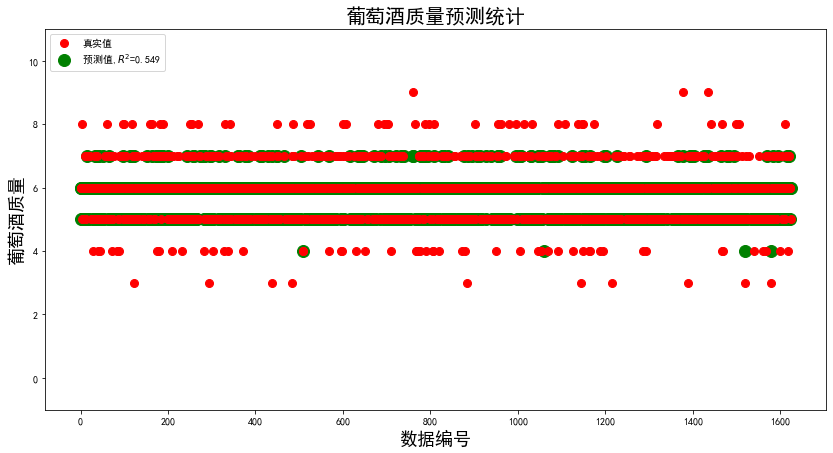

In [14]:
# 5. 数据预测
# a. 使用标准化模型进行预测数据格式化（归一化）
X_test = ss.transform(X_test)
# b. 结果数据预测
Y_predict = lr.predict(X_test)
# c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-1,11)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 12, zorder=2, label=u'预测值,$R^2$=%.3f' % lr.score(X_train, Y_train))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'葡萄酒质量', fontsize=18)
plt.title(u'葡萄酒质量预测统计', fontsize=20)
plt.show()


#### 特征工程

In [15]:
import pandas as pd
#方差选择
from sklearn.feature_selection import VarianceThreshold
#皮尔逊相关系数
from scipy.stats import pearsonr
#标准化
from sklearn.preprocessing import StandardScaler
#数据划分
from sklearn.model_selection import train_test_split
#决策树
from sklearn.tree import DecisionTreeClassifier,export_graphviz
#KNN
from sklearn.neighbors import KNeighborsClassifier
#网格搜索和交叉验证
from sklearn.model_selection import GridSearchCV
#随机森林
from sklearn.ensemble import RandomForestClassifier


特征工程
数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已，而特征工程就是最大程度从原始数据中提取主要特征供建模使用

In [16]:
#检查是否方差有为0的情况
transfer = VarianceThreshold()
new_data = transfer.fit_transform(data1)
print('new_data:\n',new_data,new_data.shape)


new_data:
 [[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]] (1599, 12)


在这12个特征中没有方差为0的情况，VarianceThreshold()中也可以设置一个阈值，删去方差小于该阈值的特征，但是这个数据集比较小，不太适合这种方法。这里选择用皮尔逊相关系数进行特征选择，可以算出两两特征之间的相关系数。

In [17]:
#特征名字索引
data_title = data1.columns.values.tolist()
r = []
for i in range(len(data_title)):
    for j in range(i+1,len(data_title)):
        print('%s和%s之间的皮尔逊相关系数为%f'%(data_title[i],data_title[j],pearsonr(data1[data_title[i]],data1[data_title[j]])[0]))
        r.append(pearsonr(data[data_title[i]],data[data_title[j]])[0])


fixed acidity和volatile acidity之间的皮尔逊相关系数为-0.256131
fixed acidity和citric acid之间的皮尔逊相关系数为0.671703
fixed acidity和residual sugar之间的皮尔逊相关系数为0.114777
fixed acidity和chlorides之间的皮尔逊相关系数为0.093705
fixed acidity和free sulfur dioxide之间的皮尔逊相关系数为-0.153794
fixed acidity和total sulfur dioxide之间的皮尔逊相关系数为-0.113181
fixed acidity和density之间的皮尔逊相关系数为0.668047
fixed acidity和pH之间的皮尔逊相关系数为-0.682978
fixed acidity和sulphates之间的皮尔逊相关系数为0.183006
fixed acidity和alcohol之间的皮尔逊相关系数为-0.061668
fixed acidity和quality之间的皮尔逊相关系数为0.124052
fixed acidity和type之间的皮尔逊相关系数为nan
volatile acidity和citric acid之间的皮尔逊相关系数为-0.552496
volatile acidity和residual sugar之间的皮尔逊相关系数为0.001918
volatile acidity和chlorides之间的皮尔逊相关系数为0.061298
volatile acidity和free sulfur dioxide之间的皮尔逊相关系数为-0.010504
volatile acidity和total sulfur dioxide之间的皮尔逊相关系数为0.076470
volatile acidity和density之间的皮尔逊相关系数为0.022026
volatile acidity和pH之间的皮尔逊相关系数为0.234937
volatile acidity和sulphates之间的皮尔逊相关系数为-0.260987
volatile acidity和alcohol之间的皮尔逊相关系数为-0.202288
volatile acidity和quality之间的皮尔逊相关

D:\anaconda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [79]:
# for i in range(len(r)):
#     if r[i]>0.6:
#         print(r[i])
#         print(i)
#     else:
#         continue


0.7209340813785245
50
0.7003571552968024
62


索引出相关系数大于0.6，即相关性比较强的特征

In [ ]:
即的特征：残留糖和密度、游离二氧化硫和总二氧化硫
残留糖和密度的相关性达到了0.83，已经是强相关，所以这里选择删去密度这一特征
在游离二氧化硫和总二氧化硫之间可以尝试进行特征选择

In [18]:
def Quality(e):
    if e>0 and e<=4:
        return 'inferior'
    elif e>4 and e<=7:
        return 'ordinary'
    else:
        return 'superior'
data['Quality'] = data['quality'].map(Quality)
data.drop(['quality'],axis=1,inplace=True)


从数据简介中了解到葡萄酒的质量等级分为0-10，分布太广，并且过于细致，为了建模后利于分类，所以将质量分为三个等级:劣质（inferior）、普通（ordinary）、优质（superior）。

### 5.4 K近邻算法建模

利用算法建模
进行建模之间需要对数据集进行划分，即将数据集分为训练集和目标集

In [19]:
#划分数据集
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state = 6)


In [20]:
#标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
#KNN预估器
estimator1 = KNeighborsClassifier()
#网格搜索和交叉验证
param_dict = {'n_neighbors':[i for i in range(1,16)]}
estimator1 = GridSearchCV(estimator1,param_grid=param_dict,cv = 10)
estimator1.fit(x_train,y_train)
#模型评估
#1)比对真实值与预测值
y_predict1 = estimator1.predict(x_test)
print('布尔比对:\n',y_predict1==y_test)
#2)查看准确率
score1 = estimator1.score(x_test,y_test)
print('模型准确率:\n',score1)
#得出最优模型
print('最佳结果:\n',estimator1.best_estimator_)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


布尔比对:
 3744     True
3975     True
1481     True
1029    False
1584     True
        ...  
649     False
430      True
3002    False
322      True
2659     True
Name: quality, Length: 1300, dtype: bool
模型准确率:
 0.6392307692307693
最佳结果:
 KNeighborsClassifier(n_neighbors=1)


### 5.5 决策树
决策树是一种典型的分类方法，首先对数据进行处理，利用归纳算法生成可读的规则和决策树，然后使用决策对新数据进行分析。本质上决策树是通过一系列规则对数据进行分类的过程。

In [24]:
# from sklearn.tree import DecisionTreeClassifier,export_graphviz
# #决策树预估器
# estimator = DecisionTreeClassifier(criterion='entropy')#信息熵
# estimator.fit(x_train,y_train)
# #模型评估
# y_predict = estimator.predict(x_test)
# #1)比对真实值与预测值
# print('布尔比对:\n',y_predict==y_test)
# #2)查看准确率
# score = estimator.score(x_test,y_test)
# print('模型准确率:\n',score)



布尔比对:
 3744     True
3975     True
1481     True
1029    False
1584     True
        ...  
649      True
430      True
3002    False
322     False
2659     True
Name: quality, Length: 1300, dtype: bool
模型准确率:
 0.6115384615384616


### 5.6 随机森林调参红酒品质预测

4.划分x，y 训练集和测试集
以y1作为target值

In [23]:
# 设置数据类型为红葡萄酒
data1['type'] = 1

# 设置数据类型为白葡萄酒
data2['type'] = 2

# 合并两个df
data = pd.concat([data1,data2], axis=0)

# 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]
# 因变量名称
quality = "quality"

In [24]:
y = data["quality"];  #将 quality 作为target
x = data.drop("quality",axis=1); # 其他作为属性
# 将葡萄酒分成两组   >5为 好酒   为1   小于5为1
y1 = (y>5).astype(int); #改变np.array中所有数据元素的数据类型。
#print(y1);
# 分 训练集合测试集合 7:3
xtrain,xtest,ytrain,ytext = model_selection.train_test_split(x,y1,test_size=0.3,random_state=1);


交叉验证 用训练集 进行交叉训练 看看不进行调参的 score为多少

In [26]:
RF_clf = RandomForestClassifier();
cv_score = model_selection.cross_val_score(RF_clf,xtrain,ytrain,scoring='accuracy',cv=10);  #scoring='accuracy' 正确率
print("cv_score",cv_score);
print("cv_score_mean",cv_score.mean());  #mean()平均值


cv_score [0.83956044 0.81978022 0.78681319 0.81758242 0.81978022 0.83296703
 0.80659341 0.81057269 0.81718062 0.83259912]
cv_score_mean 0.8183429345984411


此时 什么参数都没有调 平均的score已经达到0.7998

### 5.7 调参
我们首先调n_estimators
默认的n_estimators值是100，
我们让n_estimators从50开始 每次加10 最高到300 运行看平均score有什么变化

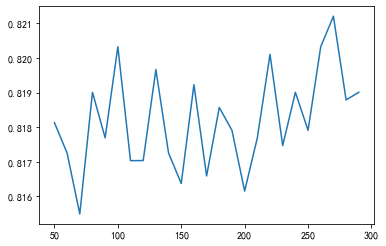

In [27]:
n_estimators_score = [];
for n in np.arange(50,300,10):
    RF_clf = RandomForestClassifier(n_estimators=n)
    cv_score = model_selection.cross_val_score(RF_clf, xtrain, ytrain, scoring='accuracy',cv=10)  # scoring='accuracy' 正确率
    n_estimators_score.append(cv_score.mean())
plt.figure()
plt.plot(np.arange(50,300,10),n_estimators_score)
plt.show()


用GridSearchCV处理

In [28]:
param_grid = {'n_estimators':range(60,80,1)}
rfc1 = model_selection.GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5)
rfc1.fit(xtrain,ytrain)
print("best_params_",rfc1.best_params_)
print("best_score_",rfc1.best_score_)

best_params_ {'n_estimators': 74}
best_score_ 0.813065680194393


现在就以n_estimators=71为值 调一下max_depth

In [29]:
param_grid = {'n_estimators':[71],'max_depth':[24],'max_features':range(3,10,1)};
rfc1 = model_selection.GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5);
rfc1.fit(xtrain,ytrain);
print("best_params_",rfc1.best_params_);
print("best_score_",rfc1.best_score_);


best_params_ {'max_depth': 24, 'max_features': 7, 'n_estimators': 71}
best_score_ 0.8084498120141685


增长了0.003左右
我们继续在以上两个值的基础上 调一下min_samples_leaf

In [30]:
param_grid = {'n_estimators':[79],'max_depth':[24],'min_samples_leaf':range(1,10,1)};
rfc1 = model_selection.GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5);
rfc1.fit(xtrain,ytrain);
print("best_params_",rfc1.best_params_);
print("best_score_",rfc1.best_score_);


best_params_ {'max_depth': 24, 'min_samples_leaf': 2, 'n_estimators': 79}
best_score_ 0.8075677897460075


可以看到调优之后 反而没有原来的好，那基本就说明 调优之后复杂度减少反而不好 所以我们就增大特征来看看 让复杂度增大试试看

In [31]:
param_grid = {'n_estimators':[79],'max_depth':[24],'max_features':range(3,10,1)};
rfc1 = model_selection.GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5);
rfc1.fit(xtrain,ytrain);
print("best_params_",rfc1.best_params_);
print("best_score_",rfc1.best_score_);


best_params_ {'max_depth': 24, 'max_features': 4, 'n_estimators': 79}
best_score_ 0.8088852621525889


还是比上一个少了
那n_estimators’=79，‘max_depth’=24 基本就可以了
我们用这两个参数 训练预测一下看看结果如何

oob_score=true 因为随机森林是随机取样的 所以总有一些样本没有取到，那么我们不能浪费啊 可以使用那些没有取到的样本对训练出来的模型进行评估

In [34]:
rfc = RandomForestClassifier(n_estimators=79,max_depth=24,oob_score=True,random_state=1)
rfc.fit(xtrain,ytrain)
print("oob_score",rfc.oob_score_)
print("score",rfc.score(xtest,ytext))
array = rfc.feature_importances_

oob_score 0.8247195953375852
score 0.8225641025641026


最终模型预测在百分之80 左右

In [99]:
# from sklearn import tree

In [100]:
# #导入数据集
# # 将数据分为训练数据和测试数据
# X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
# ln_x_test = range(len(X_test))

# features_name =data
# print(features_name)
# pd.concat([pd.DataFrame(X),pd.DataFrame(Y)],axis=1)
# #打印数据


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2,7


In [101]:
# #划分数据集，数据集划分为测试集占20%；
# x_train, x_test, y_train, y_test = train_test_split(
#         X, Y,test_size=0.2)
# # print(x_train.shape)    #(142, 13)
# # print(x_test.shape)     #(36, 13)


In [103]:
# #采用C4.5算法进行计算
# #获取模型
# model = tree.DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=None,min_samples_split=2,
#                                     min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
#                                     random_state=None,max_leaf_nodes=None,class_weight=None);
# model.fit(x_train,y_train)
# score = model.score(x_test,y_test)
# y_predict = model.predict(x_test)
# print('准确率为:',score)
# #准确率为: 0.9444444444444444


准确率为: 0.6323076923076923


In [104]:
# pd.concat([pd.DataFrame(x_test),pd.DataFrame(y_test),pd.DataFrame(y_predict)],axis=0)
# #打印数据,对测试集的预测类别标签和真实标签进行对比


,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,type,volatile acidity,0
798,9.4,0.041,0.24,0.99445,5.4,30.0,3.42,NaN,4.8,0.40,113.0,2.0,0.18,NaN
1073,10.7,0.088,0.33,0.99720,8.0,16.0,3.31,NaN,2.7,0.58,37.0,1.0,0.62,NaN
4732,11.7,0.031,0.38,0.99321,5.3,53.0,3.34,NaN,10.5,0.46,140.0,2.0,0.31,NaN
3258,9.2,0.045,0.31,0.99860,7.4,39.0,3.10,NaN,14.5,0.50,193.0,2.0,0.19,NaN
1221,12.5,0.034,0.32,0.99200,5.9,50.0,3.51,NaN,6.0,0.58,127.0,2.0,0.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [105]:
# #采用CART算法进行计算
# #获取模型
# model = tree.DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=None,min_samples_split=2,
#                                     min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
#                                     random_state=None,max_leaf_nodes=None,class_weight=None);
# model.fit(x_train,y_train)
# score = model.score(x_test,y_test)
# y_predict = model.predict(x_test)
# print('准确率为:',score)
# #准确率为: 1.0


准确率为: 0.6138461538461538


## 六、数据可视化

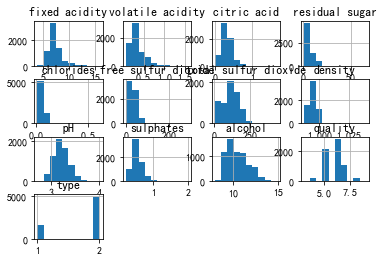

In [35]:
data.hist();#直方图
plt.show();

可以看出quality 数值主要在5，6附近 我们可以以5为分界点

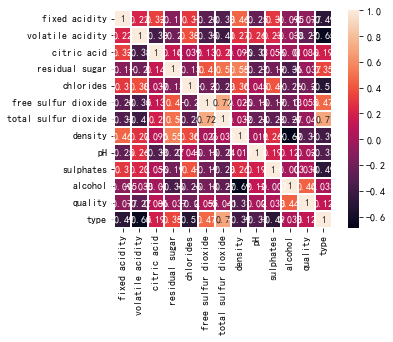

In [36]:
#变量的相关性 展示
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
plt.show();

<AxesSubplot:>

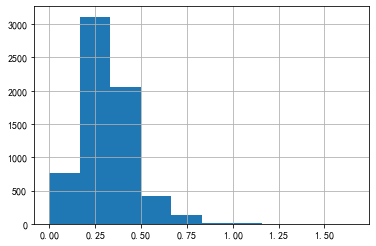

In [59]:
data['citric acid'].hist()

展示了连续型变量的分布

<AxesSubplot:>

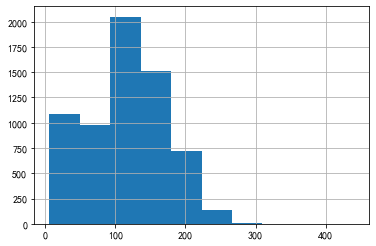

In [39]:
data['total sulfur dioxide'].hist()

<AxesSubplot:>

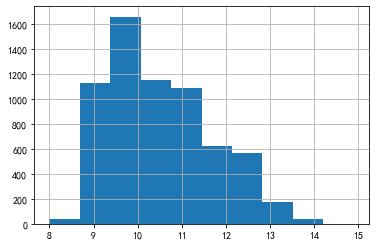

In [40]:
data['alcohol'].hist()

<AxesSubplot:>

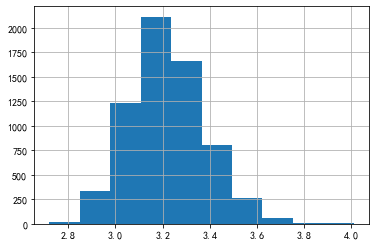

In [41]:
data['pH'].hist()

固定酸度、pH值和酒精度出现了右偏态。

<AxesSubplot:>

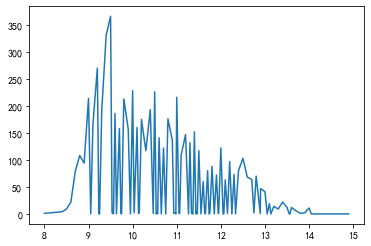

In [42]:
data['alcohol'].value_counts().sort_index().plot.line()

<AxesSubplot:>

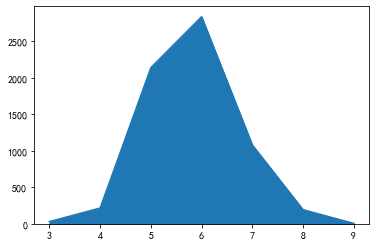

In [47]:
data['quality'].value_counts().sort_index().plot.area()

<AxesSubplot:title={'center':'type'}, ylabel='type'>

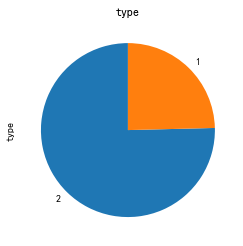

In [44]:
data['type'].value_counts().plot(kind='pie',counterclock=True,startangle=90,
                                           legend=False,title='type')

用饼状图表示红葡萄酒与白葡萄酒之间的占比关系

<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

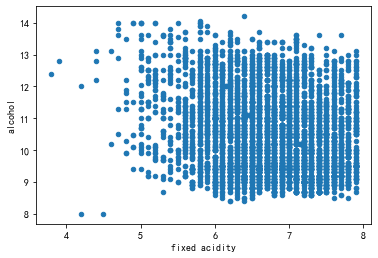

In [45]:
data[data['fixed acidity']<8].plot.scatter(x='fixed acidity',y='alcohol')

看到图中全是点，基本看不出来葡萄酒固定酸度和酒精成分之间的关系。

<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

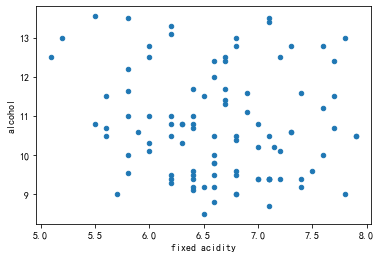

In [122]:
data[data['fixed acidity']<8].sample(100).plot.scatter(x='fixed acidity',y='alcohol')

由于散点图不能有效的处理映射相同位置的点，为了更好的表示两者之间的关系，我们需要对数据进行抽样，抽取100个点重新进行展示。

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

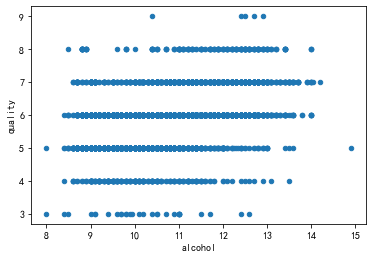

In [182]:
data.plot(x='alcohol',y='quality',kind='scatter')

从上图可以看出酒精度越高，质量评分越高。

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

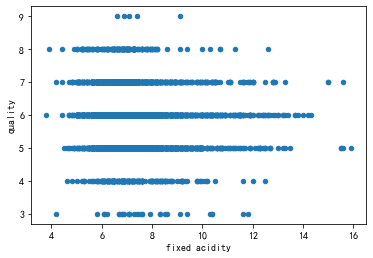

In [33]:
data.plot(x='fixed acidity',y='quality',kind='scatter')

从上图可以看出固定酸度小，质量评分偏高。

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

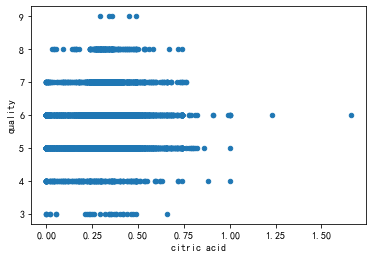

In [32]:
data.plot(x='citric acid',y='quality',kind='scatter')

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

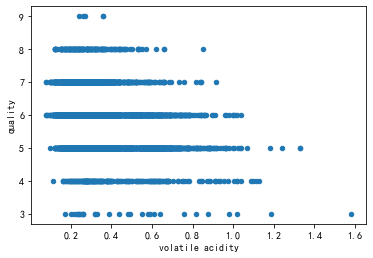

In [35]:
data.plot(x='volatile acidity',y='quality',kind='scatter')

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

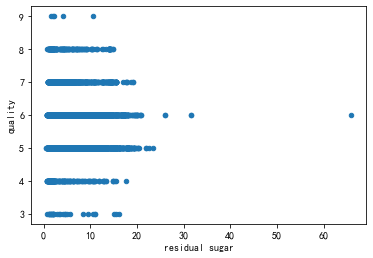

In [36]:
data.plot(x='residual sugar',y='quality',kind='scatter')

酒精度最有可能对质量产生积极的影响。


<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

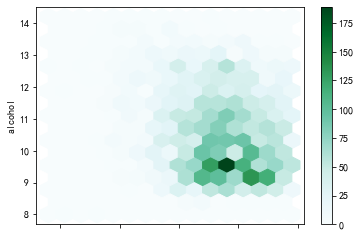

In [150]:
data[data['fixed acidity']<8].plot.hexbin(x='fixed acidity',y='alcohol',gridsize=15)

从上图可以看出在固定酸度在小于8的范围里，酒精含量主要集中在9到10之间。

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density'>

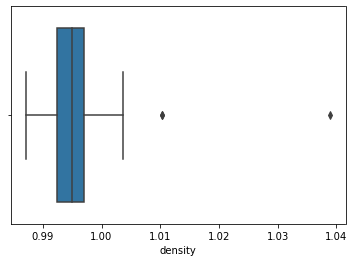

In [23]:
sns.boxplot(data.density)

葡萄酒密度主要分布在0.99到1.00之间。

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


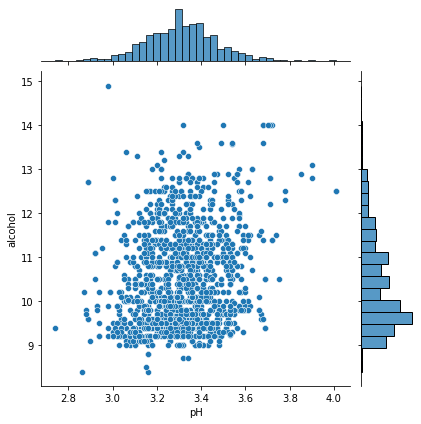

In [28]:

#多变量分布图
sns.jointplot('pH','alcohol',data1)

中间两变量关系图，上部x轴变量分布边际图，右侧y轴变量分布边际图

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


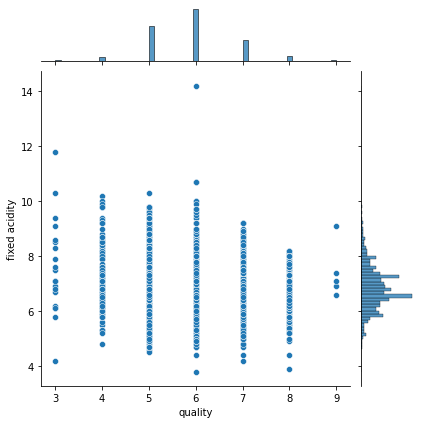

In [30]:
#多变量分布图
sns.jointplot('quality','fixed acidity',data2)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity'>

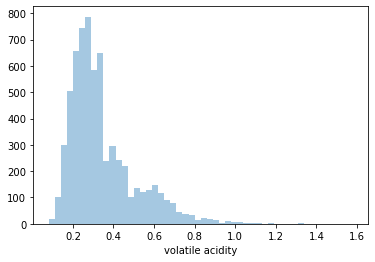

In [31]:
#单个特征的分布情况
sns.distplot(data['volatile acidity'],kde=False)

挥发性酸度

<AxesSubplot:xlabel='citric acid'>

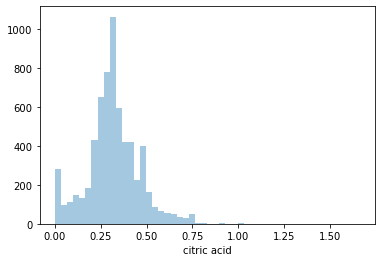

In [33]:
#单个特征的分布情况
sns.distplot(data['citric acid'],kde=False)

柠檬酸分布

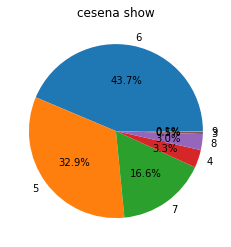

In [37]:
plt.pie(x=data['quality'].value_counts(),
        labels=data['quality'].value_counts().index,
        autopct='%.1f%%',
        
       )
plt.title('cesena show')
plt.show()

葡萄酒质量评分分布占比图

<AxesSubplot:title={'center':'关系图'}, xlabel='quality'>

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


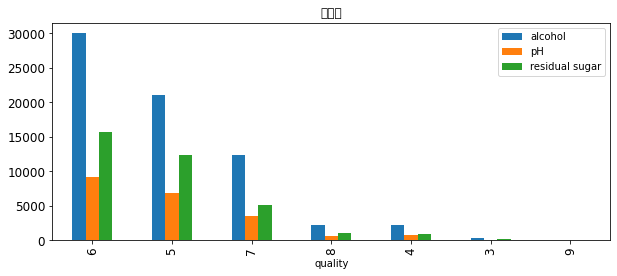

In [50]:
a_data = data.groupby(['quality'],as_index=False).sum()
a_bar = a_data.sort_values(['alcohol'],ascending=False)
# 柱形图
a_bar.plot(kind='bar', x='quality',y=['alcohol','pH','residual sugar',], figsize=(10, 4),title='关系图',fontsize=12)

酒精含量、pH值、残糖三者成分高低对质量评分影响较大

<AxesSubplot:xlabel='sulphates', ylabel='pH'>

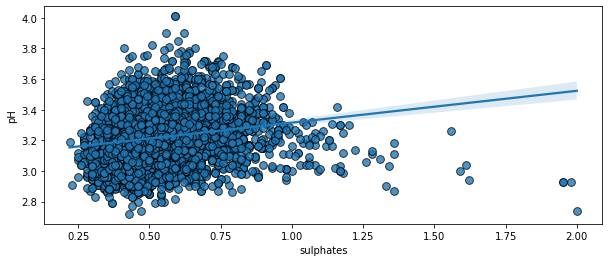

In [79]:
#带回归拟合线的散点图
plt.figure(figsize=(10,4))
ksw = dict(s=60, linewidths=.9, edgecolors='black')
sns.regplot(x='sulphates', y='pH', data=data,fit_reg=True,scatter_kws=ksw)

硫酸盐与pH值呈线性相关的关系

## 七、结论

由以上可以得出：

1.两种葡萄酒的评分都近似正态分布。

2.葡萄酒酒精含量高时评分较高，固定酸度、pH值和酒精度出现了右偏态。 

3.白葡萄酒的平均质量较红葡萄酒的高。

5.酒精度最有可能对质量产生积极的影响。

6.t检验统计量为-9.686，p值为0.000，这说明白葡萄酒的平均质量评分在统计意义上大于红葡萄酒的平均质量评分。从检验的结果来看，p值<0.05，红白两种葡萄酒质量有显著性差异，并且从均值上来看白葡萄酒的平均质量等级在统计意义上大于红葡萄酒的平均质量等级。

7.从各变量的相关系数来看酒精含量、硫酸酯、pH 值、游离二氧化硫和柠檬酸这些指标与质量呈现正相关，即当这些指标的含量增加时，葡萄酒的质量会提高；非挥发性酸、挥发性酸、残余糖分、氯化物、总二氧化硫和密度这些指标与质量呈负相关即当这些指标的含量增加时，葡萄酒的质量会降低。

8.KNN算法模型准确率: 0.6，最佳结果: KNeighborsClassifier(n_neighbors=1)。决策树决策树模型准确率:0.61，随机森林调参红酒品质预测最终模型预测在百分之80左右。从相关系数可以看出，对葡萄酒质量影响最大的是葡萄酒是酒精含量，其相关系数为0.444，其次是酒的密度，但酒的密度对酒的质量是负影响的。 